In [1]:
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt

import myokit
sys.path.append('../../../')
sys.path.append('../../../Protocols')
sys.path.append('../../../Models')
sys.path.append('../../../Lib')
import protocol_lib
from hh1592d import HH1592d

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print('"%s" has been created.'%(path))
    else:
        print("The folder already exists.")

In [3]:
result_dir = './Results'
create_folder(result_dir)

The folder already exists.


In [4]:
'''
"Hodgkin Huxley 1592d"
'''
end_time = 30

In [5]:
import simulator_myokit
'''
Simulation with Myokit
'''
model_path = "../../../mmt-model-files/hh-1952d-modern.mmt" 
model_myokit, protocol_myokit, script = myokit.load(model_path)
sim_myokit = simulator_myokit.Simulator(model_myokit, protocol_myokit)
sim_myokit.name = "HH1952d"
times = np.linspace(0, end_time, 5000)

simulated_models_myokit = []

start_time = time.time()

# y0 = sim_myokit.pre_simulate( 1000*100, sim_type=1)
d = sim_myokit.simulate(end_time=end_time)
simulated_models_myokit.append(d)

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.002788066864013672 seconds ---


In [6]:
import simulator_scipy
'''
Simulation with BDF
'''
protocol = protocol_lib.PacingProtocol(level=1, start=5, length=0.03, period=30, multiplier=0, default_time_unit='ms')
model = HH1592d(protocol)

sim_bdf = simulator_scipy.Simulator(model)
simulated_models_BDF = []

start_time = time.time()

# t_eval = np.linspace(0, t_span[1], 5000)  
sim_bdf.simulate(t_span=(0, end_time), method='BDF', max_step=0.02, atol=1E-6, rtol=1E-3)       
simulated_models_BDF.append(copy.copy(model))

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.4727296829223633 seconds ---


In [7]:
import simulator_euler
'''
Simulation with Euler
'''
sim_euler = simulator_euler.Simulator(model)
simulated_models_Euler = []

start_time = time.time()

sim_euler.dt = 0.002
sim_euler.simulate(end_time=end_time)      
simulated_models_Euler.append(copy.copy(model))

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.4627223014831543 seconds ---


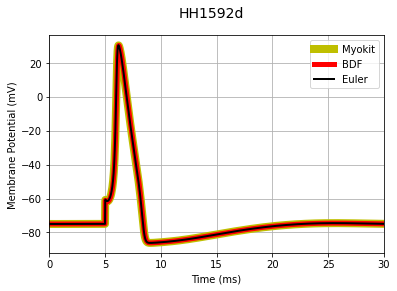

In [8]:
'''
Plot
'''
fig, ax = plt.subplots(figsize=(6,4))    
fig.suptitle(model.name, fontsize=14)

bdf = simulated_models_BDF[0]
euler = simulated_models_Euler[0]
myokit = simulated_models_myokit[0]

# ax.set_title('Simulation %d'%(simulationNo))
ax.set_xlim(bdf.times.min(), bdf.times.max())
# ax.set_ylim(ylim[0], ylim[1])
ax.set_ylabel('Membrane Potential (mV)')  
ax.set_xlabel('Time (ms)')       

ax.plot(myokit['engine.time'], myokit['membrane.V'], label='Myokit', linewidth=8, color='y') 
ax.plot(bdf.times, bdf.V, label='BDF', linewidth=5, color='r')   
ax.plot(euler.times, euler.V, label='Euler', linewidth=2, color='k')   
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], \
#             GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
ax.grid()    
plt.show()
fig.savefig(os.path.join(result_dir, "HodgkinHuxley1592d.jpg"), dpi=100)

In [9]:
print("Complete")

Complete
